# Funance Blog Vol.3 Exploratory Analysis

In [2]:
# import dependencies
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from scipy.stats import kstest, shapiro

import warnings
warnings.filterwarnings("ignore") 

In [3]:
# looking at snp 500 history
ticker = '^GSPC'
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# download data
data = yf.download(ticker, start=start_date, end=end_date).dropna()

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


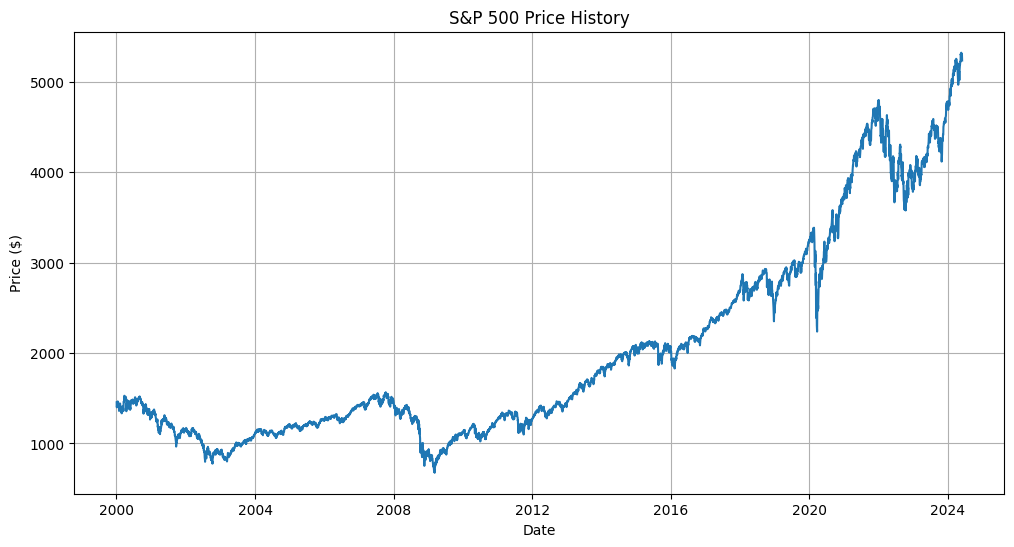

In [5]:
# plot data
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'])
plt.title('S&P 500 Price History')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.show()

In [6]:
data['Adj Close'].describe()

count    6141.000000
mean     2025.966341
std      1125.658709
min       676.530029
25%      1195.900024
50%      1469.439941
75%      2669.909912
max      5321.410156
Name: Adj Close, dtype: float64

In [7]:
# histogram
def hist(data: np.array, title: str) -> None:
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=100)
    # mean line
    plt.axvline(data.mean(), color='red', linestyle='dashed', linewidth=1)
    # median line
    plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=1)
    plt.title(title)
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

In [8]:
# QQ plots
def qq_plot(x: np.array, title: str) -> None:
    normal_dist = np.random.normal(0, 1, len(x))

    x = np.sort(x)
    y = np.sort(normal_dist)

    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
    plt.scatter(x, y, s=5)
    sm.qqline(ax, 'r', x, y)
    plt.title(title)
    plt.grid()
    plt.show()

In [9]:
# box plot
def box_plot(data: np.array, title: str) -> None:
    plt.figure(figsize=(12, 6))
    plt.boxplot(data)
    plt.title(title)
    plt.ylabel('Price')
    plt.grid()
    plt.show()

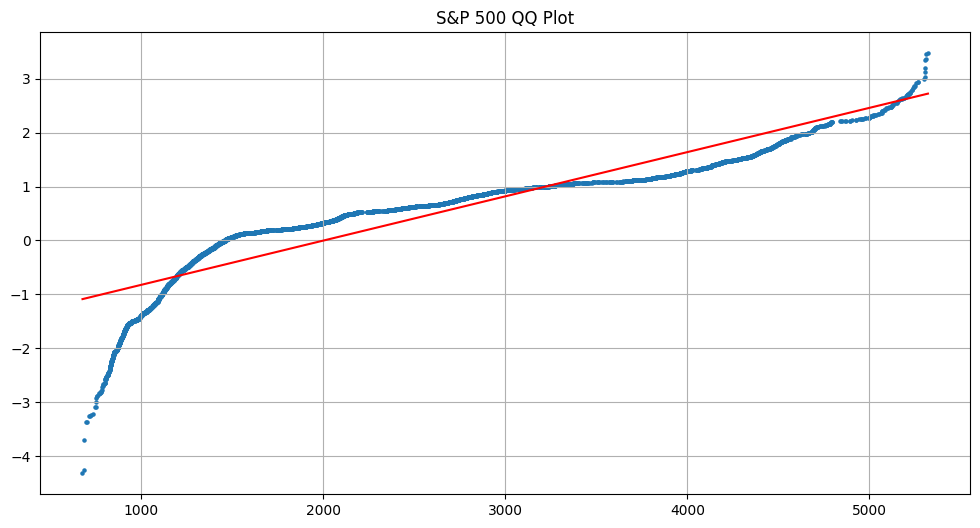

In [10]:
# SnP 500 qq plot
qq_plot(data['Adj Close'], 'S&P 500 QQ Plot')

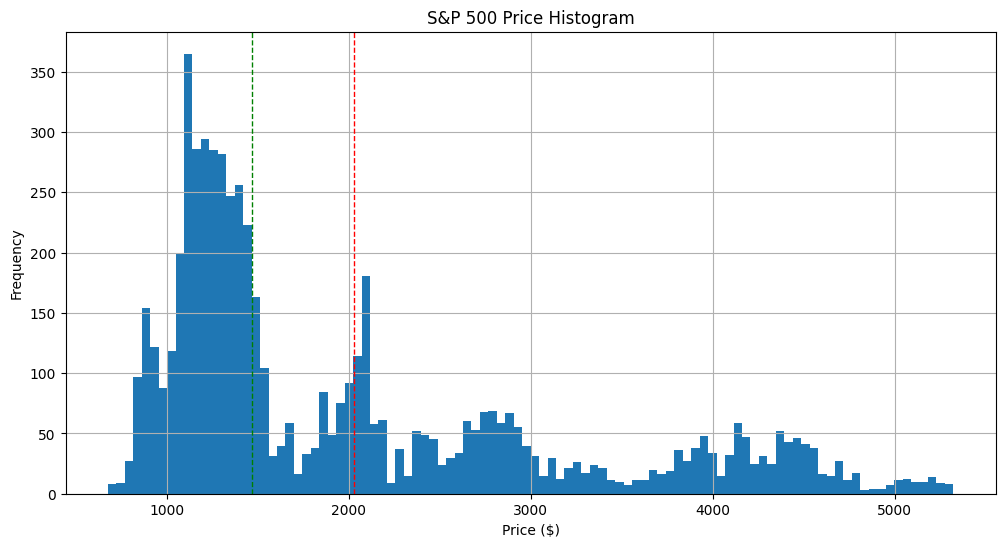

In [11]:
# SnP 500 histogram
hist(data['Adj Close'], 'S&P 500 Price Histogram')

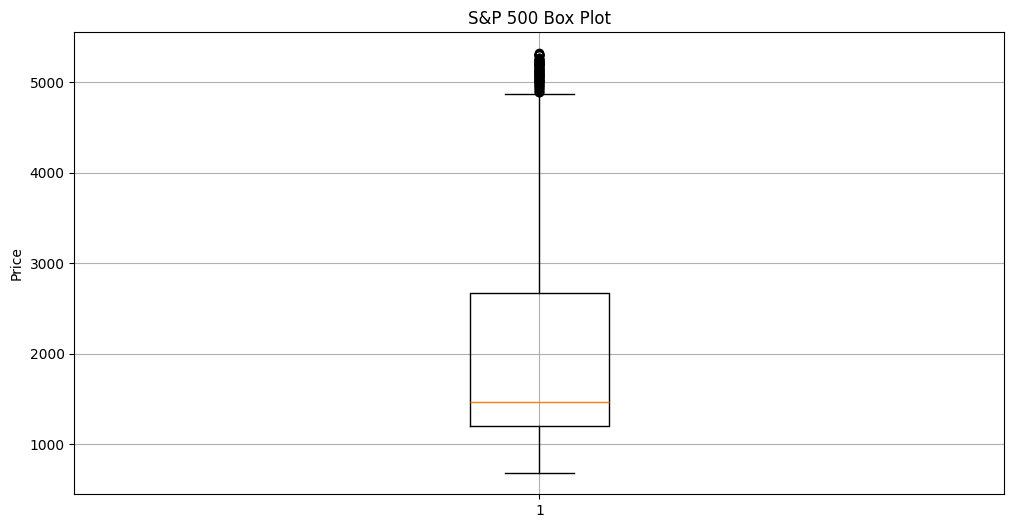

In [12]:
# SnP 500 box plot
box_plot(data['Adj Close'], 'S&P 500 Box Plot')

In [13]:
# Shapiro-Wilk test
shapiro_test = shapiro(data['Adj Close'])

# Kolmogorov-Smirnov test
ks_test = kstest(data['Adj Close'], 'norm')

print(f'Shapiro-Wilk Test: {shapiro_test}')
print(f'Kolmogorov-Smirnov Test: {ks_test}')

Shapiro-Wilk Test: ShapiroResult(statistic=0.8373581112170396, pvalue=7.162848955077888e-62)
Kolmogorov-Smirnov Test: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=676.530029296875, statistic_sign=-1)


In [14]:
# differenced data
diff_data = data['Adj Close'].diff().dropna()

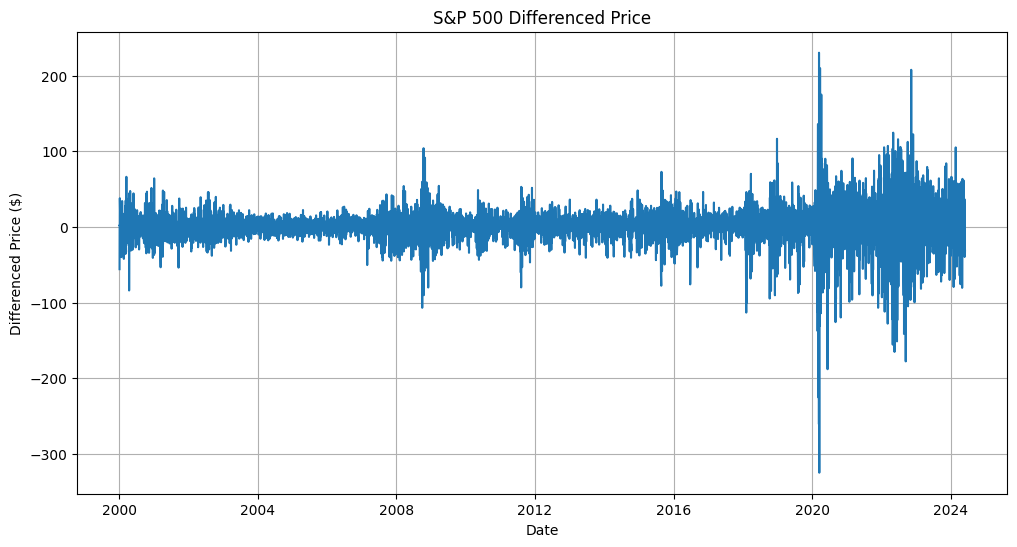

In [15]:
# basic plot
plt.figure(figsize=(12, 6))
plt.plot(diff_data)
plt.title('S&P 500 Differenced Price')
plt.xlabel('Date')
plt.ylabel('Differenced Price ($)')
plt.grid()
plt.show()

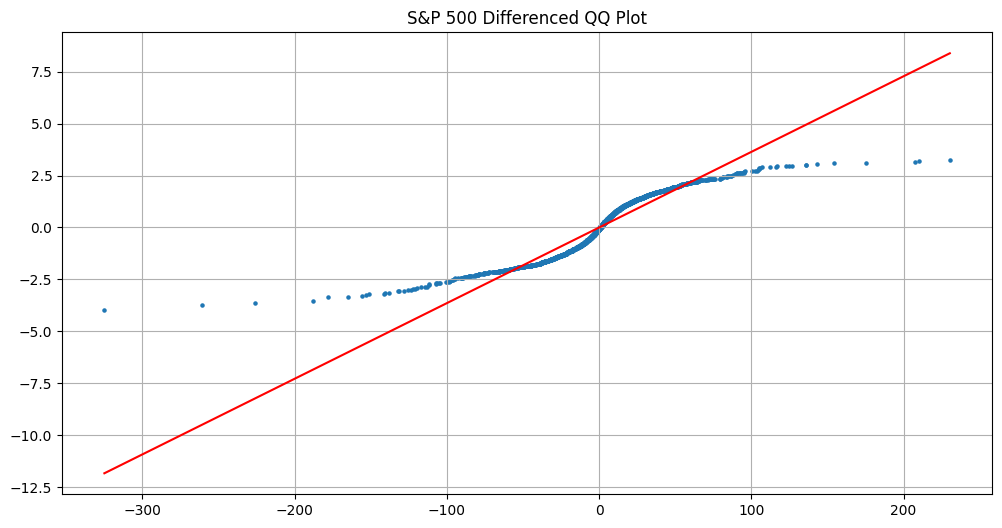

In [16]:
qq_plot(diff_data, 'S&P 500 Differenced QQ Plot')

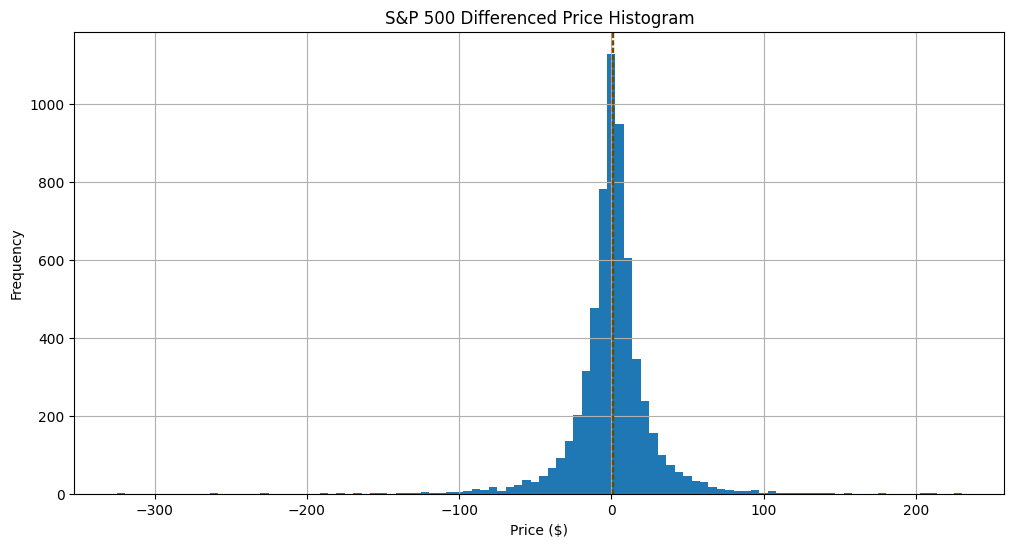

In [17]:
hist(diff_data, 'S&P 500 Differenced Price Histogram')

In [18]:
# Shapiro-Wilk test
shapiro_test = shapiro(diff_data)

# Kolmogorov-Smirnov test
ks_test = kstest(diff_data, 'norm')

print(f'Shapiro-Wilk Test: {shapiro_test}')
print(f'Kolmogorov-Smirnov Test: {ks_test}')

Shapiro-Wilk Test: ShapiroResult(statistic=0.8478426786892, pvalue=1.3223569080157265e-60)
Kolmogorov-Smirnov Test: KstestResult(statistic=0.4441186120301237, pvalue=0.0, statistic_location=2.219970703125, statistic_sign=-1)
